## Plotting and comparing the implemented jet substructure modules

In [2]:
using Plots
using CurveFit
using CSV, DataFrames
using StatsPlots


In [14]:
dataP = CSV.read("./results/jhtop-python.csv", DataFrame, header=true, delim=",")
dataJ = CSV.read("./results/jhtop-julia.csv", DataFrame, header=true, delim=",");


LinearFit{Float64}((0.0, 1.0))


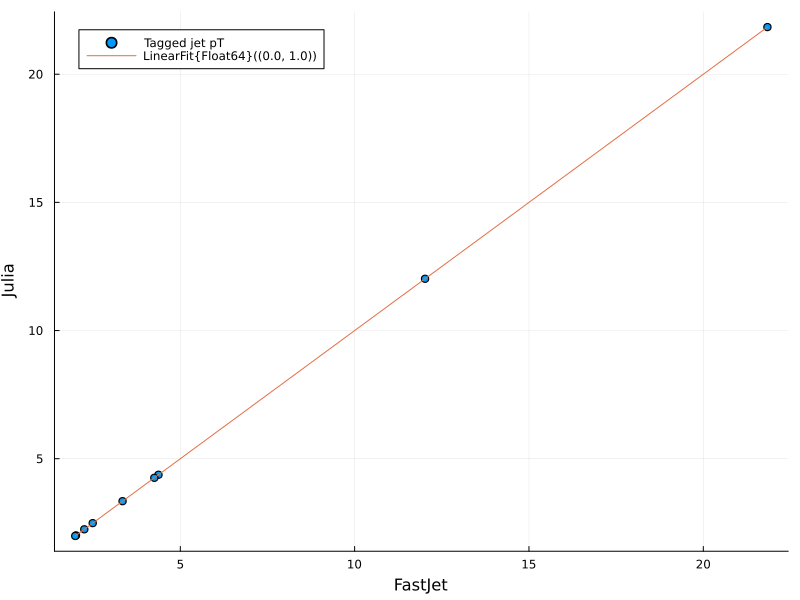

In [17]:
x = dataJ[!, :pt]
y = dataP[!, :pt]

scatter(x, y, label="Tagged jet pT", xlabel="FastJet", ylabel="Julia", size=(800,600))

fit = curve_fit(LinearFit, x, y)
X = range(minimum(x), maximum(x), 50)
Y = fit.(X)
println(fit)
plot!(X,Y, label="$(fit)")


In [18]:
savefig("./results/plot-jhtop-pt.png")


"/Users/sattwamoghosh/gitrepo/julia-JetSubstructure/results/plot-jhtop-pt.png"

In [10]:
dataP = CSV.read("./results/time-jhtop-python.csv", DataFrame, header=true, delim=",")
dataJ = CSV.read("./results/time-jhtop-julia.csv", DataFrame, header=true, delim=",");


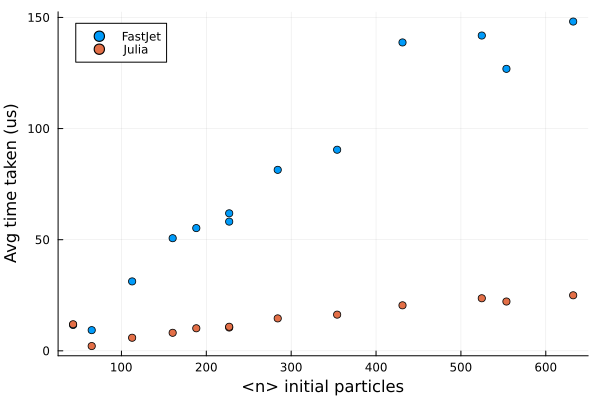

In [12]:
@df dataP scatter(:mean_particles, :time_per_event, label="FastJet", xlabel="<n> initial particles", ylabel="Avg time taken (us)")
# @df dataP plot!(:mean_particles, :time_per_event, label="")
@df dataJ scatter!(:mean_particles, :time_per_event, label="Julia")
# @df dataJ plot!(:mean_particles, :time_per_event, label="")

In [13]:
savefig("./results/time-jhtop.png")

"/Users/sattwamoghosh/gitrepo/julia-JetSubstructure/results/time-jhtop.png"